In [1]:
import numpy as np
import itertools

In [13]:
import matplotlib.pyplot as plt

In [3]:
# this can probably be sped up with DP; one counter for each dimension n

def kernelize(n, d, xt):
    # returns phi(xt), dimension n^d
    phi_xt = np.array([], dtype=float)
    for k in range(1, d + 1):
        combos_k = list(itertools.combinations_with_replacement(np.arange(len(xt)),k))
        # print(combos)
        phi_xt_k = np.ones(len(combos_k), dtype=float)
        for i in range(len(combos_k)):
            tup = combos_k[i]
            for j in tup:
                phi_xt_k[i] *= xt[j]
                
        phi_xt = np.concatenate((phi_xt, phi_xt_k))
    return phi_xt
    

In [38]:
n = 20
d = 3
t = 3000

In [39]:
phi = np.array([])
for i in range(t):
    # sample haar random from dimension d;
    xt = np.random.normal(size=(n, 1))
    xt = xt/np.linalg.norm(xt)
    
    # boost it up to the kernel dimension (1000);
    phi_xt = kernelize(xt, d, xt)
    if len(phi) == 0:
        phi = np.array([phi_xt])
    else:
        phi = np.concatenate((phi, np.array([phi_xt])), axis=0)
    # print(xt, np.linalg.norm(xt))
    
print(phi.shape, phi)

(3000, 1770) [[-3.39336163e-01  2.84939913e-01 -6.33718415e-02 ...  4.65955938e-04
  -3.22416945e-05  2.23095529e-06]
 [-3.53254475e-01  5.07400348e-02 -2.11558894e-01 ...  2.78093474e-03
   9.99911829e-03  3.59527913e-02]
 [-1.73740211e-01  1.32860296e-01  5.23055947e-02 ... -1.07112382e-05
  -4.71522592e-06 -2.07570358e-06]
 ...
 [ 3.52292099e-01 -6.46429558e-03  1.73947950e-01 ... -2.06123883e-02
   3.04397283e-02 -4.49524358e-02]
 [ 4.18283202e-03 -1.71346402e-01 -1.60728252e-01 ...  1.75334427e-03
   1.17367945e-03  7.85654860e-04]
 [ 7.92401363e-02 -2.18468058e-02  2.98200050e-02 ... -6.52326559e-02
   4.25627500e-02 -2.77711779e-02]]


In [40]:
lambda_range = [0.01, 0.1, 0.2, 0.5, 1.0, 3.0, 10.0]

In [41]:
for lambd in lambda_range:
    # compute the effective dimension
    cov = phi @ phi.T
    d_eff = np.trace(cov @ (np.linalg.inv(cov + lambd * np.identity(t))))
    
    d_eff2 = 0.5 * np.log (np.linalg.det((1/lambd) * cov + np.identity(t)))
    print(d_eff, d_eff2)
    # fairly similar

/Users/tchen/opt/miniconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


1652.3109155658972 inf
1233.8689411680189 inf
1024.1797621138387 inf
734.98748797503 inf
540.4822010470788 inf
310.96471015699615 248.7250630051703
155.81073369505634 112.37736902513579


([<matplotlib.axis.YTick at 0x7fec0f042dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

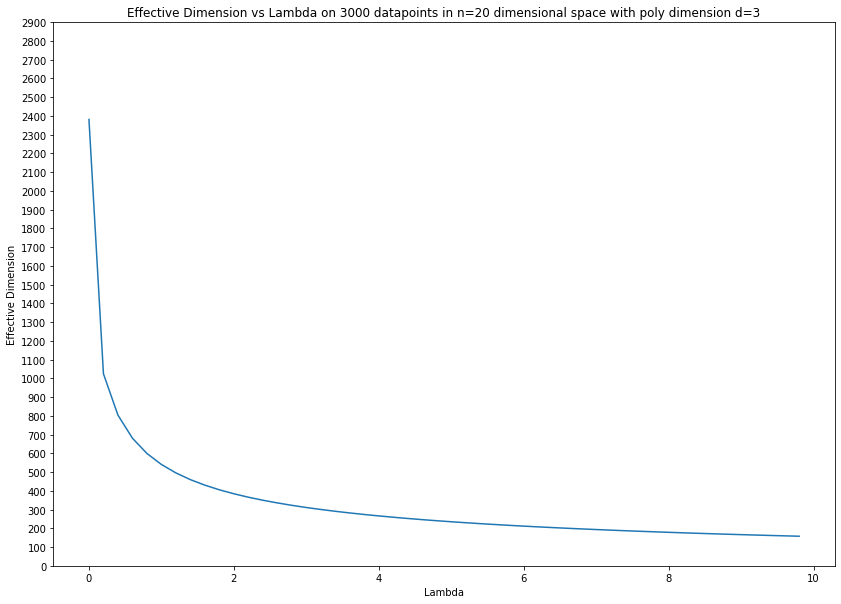

In [43]:
lambda_range = np.arange(50) * 0.2
effective_dims = []
for lambd in lambda_range:
    # compute the effective dimension
    cov = phi @ phi.T
    d_eff = np.trace(cov @ (np.linalg.inv(cov + lambd * np.identity(t))))
    effective_dims.append(d_eff)

plt.figure(figsize=(14,10))
plt.plot(lambda_range, effective_dims)
plt.title('Effective Dimension vs Lambda on 3000 datapoints in n=20 dimensional space with poly dimension d=3')
plt.xlabel('Lambda')
plt.ylabel('Effective Dimension')
plt.yticks(range(0, 3000, 100))